In [38]:
import json
import pandas as pd
import matplotlib.pyplot as plt

In [55]:
ROOT = "/home/lazye/Documents/ufrgs/mcs/clip/clip-bias-explore/\
fair-face-classification"
RESULTS_PATH = ROOT + "/data/results"
IMG_PATH = "/home/lazye/Documents/ufrgs/mcs/datasets/FairFace/"

# original paper preds df with race_gender preds
opd_df = pd.read_csv(RESULTS_PATH+"/original_paper_preds.csv")

# top synm preds df
topk_df = pd.read_csv(RESULTS_PATH+"/arg_top_synms.csv")

# avg sum synm preds df
avg_df = pd.read_csv(RESULTS_PATH+"/arg_sum_synms.csv")

# similarities dictionary
with open("similarities.json", encoding="utf-8") as f:
    sims_dict = json.load(f)

In [40]:
def show_img(path, title, label):
    img = plt.imread(path)
    plt.imshow(img)
    plt.title(title)
    plt.xlabel(label)
    plt.show()

In [78]:
sims_dict[fname]['a photo of a man']

25.28125

In [80]:
def compare_methods(row):
    """Compares activations of topk and avg ensembles
    displays image and true label aswell"""
    fname = row.name
    fpath = f'{IMG_PATH}/{fname}'
    y_label = row['gender']
    top_synm = row['synm']
    row_sims = sims_dict[fname]
    man_score = sum(list(row_sims.values())[:32])
    woman_score = sum(list(row_sims.values())) - man_score
    top_synm_score = row_sims[top_synm]
    print(f"true label: {y_label}")
    print(f"Top K synm: {top_synm}")
    print(f"Top K val: {top_synm_score}")
    print(f"man score: {man_score}")
    print(f"woman score: {woman_score}")
    print(json.dumps(row_sims, indent=4))

    show_img(fpath, y_label, top_synm)

In [41]:
topk_misses = topk_df[topk_df['gender'] != topk_df['gender_preds']]
avg_misses = avg_df[avg_df['gender'] != avg_df['gender_preds']]

In [42]:
# grabbing avg wins of 0-2 and topk wins of 50-59

new_df = topk_df.set_index(
    'file').join(avg_df.drop(columns=['age', 'gender', 'race']).rename(columns={'gender_preds':'avg_preds'}).set_index('file'))
new_df = new_df.rename(columns={'gender_preds': 'topk_preds'})
avg_wins_0_2 = new_df[new_df['age'] == '0-2'][new_df['avg_preds']
                                              != new_df['topk_preds']][new_df['avg_preds'] == new_df['gender']]
topk_wins_50_70 = new_df[new_df['age'] == '50-59'][new_df['avg_preds']
                                                   != new_df['topk_preds']][new_df['topk_preds'] == new_df['gender']]

true label: Female
Top K synm: a photo of a young asian man
Top K val: 28.109375
man score: 690.265625
woman score: 695.171875
{
    "a photo of a man": 20.875,
    "a photo of a black man": 20.203125,
    "a photo of a young black man": 21.390625,
    "a photo of an old black man": 19.484375,
    "a photo of a middle-aged black man": 19.75,
    "a photo of a white man": 21.890625,
    "a photo of a young white man": 22.734375,
    "a photo of an old white man": 20.984375,
    "a photo of a middle-aged white man": 20.953125,
    "a photo of a hispanic man": 21.0625,
    "a photo of a young hispanic man": 22.8125,
    "a photo of an old hispanic man": 20.25,
    "a photo of a middle-aged hispanic man": 20.34375,
    "a photo of a latino man": 21.421875,
    "a photo of a young latino man": 23.0625,
    "a photo of an old latino man": 20.40625,
    "a photo of a middle-aged latino man": 20.921875,
    "a photo of an indian man": 20.78125,
    "a photo of a young indian man": 22.515625,
 

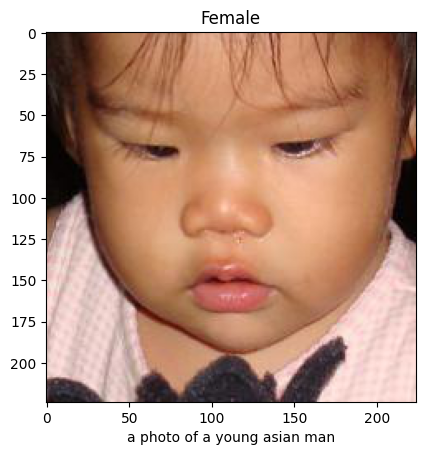

In [81]:
row = avg_wins_0_2.iloc[3]
compare_methods(row)

true label: Female
Top K synm: a photo of a middle-aged latino woman
man score: 751.15625
woman score: 739.84375
{
    "a photo of a man": 24.453125,
    "a photo of a black man": 21.96875,
    "a photo of a young black man": 20.109375,
    "a photo of an old black man": 22.421875,
    "a photo of a middle-aged black man": 22.484375,
    "a photo of a white man": 23.234375,
    "a photo of a young white man": 21.859375,
    "a photo of an old white man": 23.546875,
    "a photo of a middle-aged white man": 23.5625,
    "a photo of a hispanic man": 24.53125,
    "a photo of a young hispanic man": 23.625,
    "a photo of an old hispanic man": 25.3125,
    "a photo of a middle-aged hispanic man": 24.78125,
    "a photo of a latino man": 25.09375,
    "a photo of a young latino man": 24.25,
    "a photo of an old latino man": 25.84375,
    "a photo of a middle-aged latino man": 25.65625,
    "a photo of an indian man": 23.359375,
    "a photo of a young indian man": 21.84375,
    "a photo 

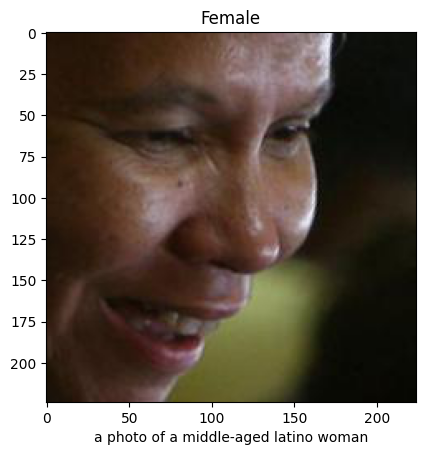

In [75]:
row = topk_wins_50_70.iloc[2]
compare_methods(row)